<pre>
<img align="center" width="300" src="https://raw.githubusercontent.com/andrelmfsantos/ppga/master/logo%20uninove.png">
</pre>

<pre>
<img align="center" width="150" src="https://camo.githubusercontent.com/bdc6a3b8963aa99ff57dfd6e1e4b937bd2e752bcb1f1936f90368e5c3a38f670/68747470733a2f2f696d672e736869656c64732e696f2f62616467652f4c6963656e73652d434325323042592d2d5341253230342e302d6c69676874677265792e737667">
</pre>

<h1 style="text-align:center;">Trabalhando com timeseries com Julia Language Programming</h1>

|                 |              |
|:----------------|:-------------|
|**Universidade:**| Nove de Julho|
|**Programa:**    | PPGI - Programa de Pós Graduação em Informática |
|**Disciplina:**  | Computação Científica com Julia|
|**Professor:**   | José E. Storopoli|
|**Aluno:**       | André L.M.F.Santos|

In [1]:
# Adicionar Pacotes
using Pkg
Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("HTTP"); Pkg.add("Plots"); Pkg.add("PyPlot")

    Updating registry at `C:\Users\karin\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\karin\.julia\environments\v1.7\Manifest.toml`


In [2]:
# Usar pacotes
using DataFrames, HTTP, CSV, Dates, Statistics, Plots

In [3]:
# Ler arquivo csv no github
using DataFrames, HTTP, CSV
resp = HTTP.request("GET", "https://raw.githubusercontent.com/andrelmfsantos/df/main/TweetsTratados_HBM_DatasetTweets48281Label1.csv?accessType=DOWNLOAD")
data = CSV.read(IOBuffer(String(resp.body)), DataFrame);
first(data,5)

,ID,DATE,HASHTAGS,USER9ID,USERNAME
,String31,String31,String,String31,String15
1,1338262133637836801,2020-12-13 20:18:51,[],286944861,mlgaldino
2,1343907450030878720,2020-12-29 10:11:19,[],592762484,Tiolunerdweek
3,1247513631920717825,2020-04-07 10:16:42,[],43002988,marcospaulodj
4,1247390197790248963,2020-04-07 02:06:13,[],529741713,faela8520
5,1236304898167394305,2020-03-07 11:57:11,[],1109654103913873408,sabrinantunesoa


In [4]:
# Subset com variáveis de interesse
df = select(data, :DATE, :N9SYMPTOMS, :N9FOLLOWERS, :N9FRIENDS);
last(df,5)

,DATE,N9SYMPTOMS,N9FOLLOWERS,N9FRIENDS
,String31,Int64,Int64?,Int64?
1,2020-05-11 10:32:04,1,1452,2083
2,2020-09-07 19:52:57,1,missing,missing
3,2020-08-15 07:50:38,1,11,77
4,2020-03-23 17:35:53,2,169,685
5,2020-06-19 22:57:01,1,426,429


In [5]:
# Resumo 1 com dataframe transposto
permutedims(describe(df),1)

,variable,DATE,N9SYMPTOMS,N9FOLLOWERS,N9FRIENDS
,String,Any,Any,Any,Any
1,mean,,1.49197,4483.07,992.595
2,min,2020-01-01 00:11:55,1,0,0
3,median,,1.0,427.0,430.0
4,max,2020-12-30 22:23:10,10,13724992,111852
5,nmissing,0,0,2407,2407
6,eltype,String31,Int64,"Union{Missing, Int64}","Union{Missing, Int64}"


In [6]:
# Remove dados faltantes
df = dropmissing(df, :)
last(df,5)

,DATE,N9SYMPTOMS,N9FOLLOWERS,N9FRIENDS
,String31,Int64,Int64,Int64
1,2020-03-29 16:34:37,1,729,616
2,2020-05-11 10:32:04,1,1452,2083
3,2020-08-15 07:50:38,1,11,77
4,2020-03-23 17:35:53,2,169,685
5,2020-06-19 22:57:01,1,426,429


In [7]:
# Resumo 2 com dataframe transposto
permutedims(describe(df),1)

,variable,DATE,N9SYMPTOMS,N9FOLLOWERS,N9FRIENDS
,String,Any,Any,Any,Any
1,mean,,1.49313,4483.07,992.595
2,min,2020-01-01 00:45:14,1,0,0
3,median,,1.0,427.0,430.0
4,max,2020-12-30 20:29:28,10,13724992,111852
5,nmissing,0,0,0,0
6,eltype,String31,Int64,Int64,Int64


In [8]:
# Renomear colunas
colnames = ["period", "symptoms","followers","friends"]
rename!(df, Symbol.(colnames))
first(df,5)

,period,symptoms,followers,friends
,String31,Int64,Int64,Int64
1,2020-12-13 20:18:51,1,293,286
2,2020-12-29 10:11:19,1,212,483
3,2020-04-07 10:16:42,1,651,259
4,2020-04-07 02:06:13,1,3121,4264
5,2020-03-07 11:57:11,1,277,235


In [9]:
# Transformar series "period" em datetime
df.period = Date.(df.period, "yyyy-mm-dd HH:MM:SS")
first(df,5)

,period,symptoms,followers,friends
,Date,Int64,Int64,Int64
1,2020-12-13,1,293,286
2,2020-12-29,1,212,483
3,2020-04-07,1,651,259
4,2020-04-07,1,3121,4264
5,2020-03-07,1,277,235


In [10]:
# Criar coluna mês
df = transform(df, :period => ByRow(month) => :mes)
first(df,5)

,period,symptoms,followers,friends,mes
,Date,Int64,Int64,Int64,Int64
1,2020-12-13,1,293,286,12
2,2020-12-29,1,212,483,12
3,2020-04-07,1,651,259,4
4,2020-04-07,1,3121,4264,4
5,2020-03-07,1,277,235,3


In [11]:
# Remover a coluna "period"
df = select(df, Not(:period))
first(df,5)

,symptoms,followers,friends,mes
,Int64,Int64,Int64,Int64
1,1,293,286,12
2,1,212,483,12
3,1,651,259,4
4,1,3121,4264,4
5,1,277,235,3


In [12]:
# Agrupar colunas pela média (symptoms) e soma (followers, friends)
gdf = groupby(df, :mes)
mdf = combine(gdf, [:symptoms, :followers, :friends] .=> mean; renamecols=false)
sdf = combine(gdf, [:symptoms, :followers, :friends] .=> sum; renamecols=false)
cdf = combine(groupby(df, [:mes]), nrow => :count)

,mes,count
,Int64,Int64
1,1,1871
2,2,2144
3,3,9046
4,4,5474
5,5,4628
6,6,3177
7,7,3888
8,8,3261
9,9,2625


In [13]:
# Remover a colunas em mdf e sdf
mdf = select!(mdf, [:mes,:symptoms]);
sdf = select!(sdf, Not(:symptoms));

In [14]:
# Agrupar dataframes
# mes:       Mês do tweet sobre sintomas da COVID-19
# symptoms:  Média de sintomas mencionados por tweet
# followers: Total de seguidores
# friends:   Total de amigos
# count:     Total de tweets
gdfs = innerjoin(mdf, sdf, cdf, on = :mes)

,mes,symptoms,followers,friends,count
,Int64,Float64,Int64,Int64,Int64
1,1,1.49225,3706058,1475869,1871
2,2,1.50979,11682131,1775640,2144
3,3,1.74398,60596272,8210803,9046
4,4,1.7384,58193947,5767508,5474
5,5,1.60328,11607674,4283704,4628
6,6,1.5118,9583552,3393692,3177
7,7,1.26723,9251812,4431732,3888
8,8,1.19258,6811629,3690393,3261
9,9,1.17943,6604525,2417270,2625


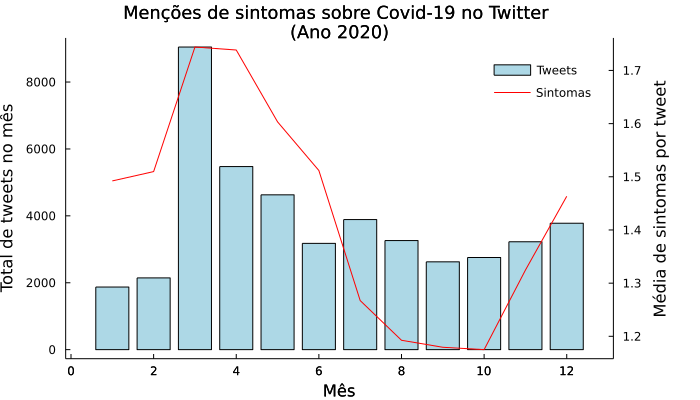

In [15]:
using Plots; gr()
using Plots.PlotMeasures
axis_x1, axis_y1 = gdfs[:,:mes], gdfs[:,:count]
axis_x2, axis_y2 = gdfs[:,:mes], gdfs[:,:symptoms]
#bar(axis_x1, axis_y1, label = "Tweets", legend = :topright)
plot(axis_x1, axis_y1, ylabel = "Total de tweets no mês", color = :lightblue, label = "Tweets", right_margin=2cm, legend=(0.86, 0.9), fg_legend = :transparent, grid=false, seriestype = :bar)
plot!(twinx(), [axis_y2], ylabel = "Média de sintomas por tweet", color = :red, label = "Sintomas", legend=(0.86, 0.83), fg_legend = :transparent, seriestype = :line,size=(700,400))
title!("Menções de sintomas sobre Covid-19 no Twitter \n(Ano 2020)", titlefontsize = 12)
xaxis!("Mês")
#yaxis!("Tweets")

__Referências:__

* [supabase - 48281 Tweets](https://supabase.com/)
* [Github - 48281 Tweets](https://raw.githubusercontent.com/andrelmfsantos/df/main/TweetsTratados_HBM_DatasetTweets48281Label1.csv)
* [SRAG 2020 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19](https://dados.gov.br/dataset/bd-srag-2020)
* [Ciência de Dados e Computação Científica com Julia](https://github.com/storopoli/Computacao-Cientifica)
* [Julia - Database Packages](https://juliapackages.com/c/database)
* [Julia language: a concise tutorial](https://syl1.gitbook.io/julia-language-a-concise-tutorial/useful-packages/dataframes)
* [Julia DataScience](https://juliadatascience.io/)
* [Remove missing](https://discourse.julialang.org/t/how-to-remove-rows-containing-missing-from-dataframe/12234)
* [Drop missing values from columns](https://stackoverflow.com/questions/62789334/how-to-remove-drop-rows-of-nothing-and-nan-in-julia-dataframe)
* [DataFrames.jl](https://docs.juliahub.com/DataFrames/AR9oZ/0.21.7/)
* [DataFrame, aggregate by month of date](https://discourse.julialang.org/t/dataframe-aggregate-by-month-of-date/34428)
* [Converting string to DateTime in DataFrame](https://discourse.julialang.org/t/converting-string-to-datetime-in-dataframe/49524/3)
* [How to convert String Series to Datetime Series in Julia](https://stackoverflow.com/questions/62750879/how-to-convert-string-series-to-datetime-series-in-julia)
* [Plots](https://docs.juliaplots.org/latest/generated/attributes_plot/)
* [The label of the second y axis on the right is partially missing](https://github.com/JuliaPlots/Plots.jl/issues/2636)